In [1]:
## Imports 

# General
import os
import numpy as np
import matplotlib.pyplot as plt

# Redundency to avoid going higher than the repo level
if 'graphs.ipynb' in os.listdir():
    os.chdir('..')

# Local
from data import load_108

# Display current directory, this is supposed to be the repo
os.listdir()

['.gitignore',
 '.vscode',
 'data',
 'FeatureExtractor',
 'notebook',
 'README.md',
 'working.ipynb']

In [2]:
## Load the data and drop discrete columns

# Load
Dataframe = load_108()

# Display
Dataframe.head()

# Drop discrete columns
columns_to_drop = [column for column in Dataframe.columns if not (column.startswith('M') or column.startswith('SD'))]
columns_to_drop.remove('label')
Dataframe = Dataframe.drop(columns=columns_to_drop)

SD_mots: 1.0


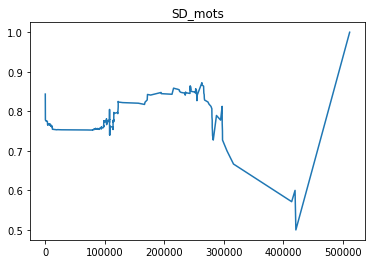

M_adjectifs: 0.6


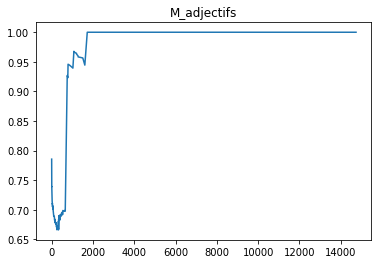

M_prépositions: 0.5752475247524752


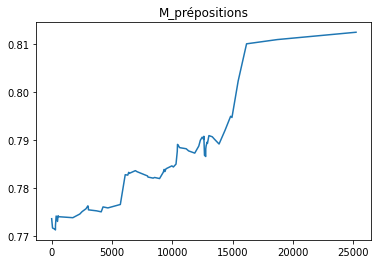

M_adverbes: 0.14405940594059405


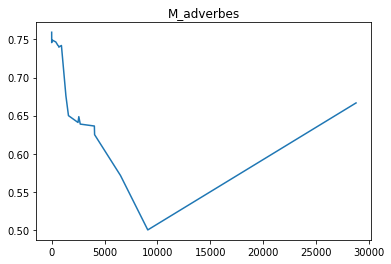

M_déterminants: 0.6356435643564357


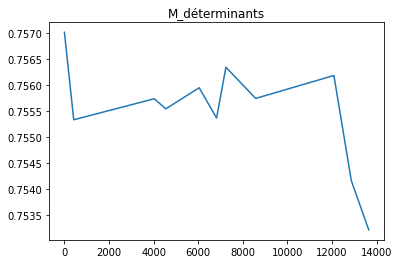

M_noms: 0.8737623762376238


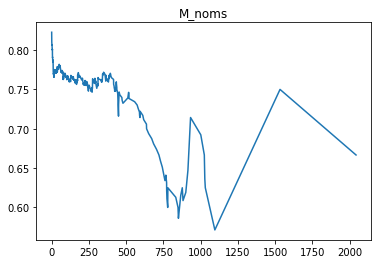

M_noms propres: 0.30495049504950494


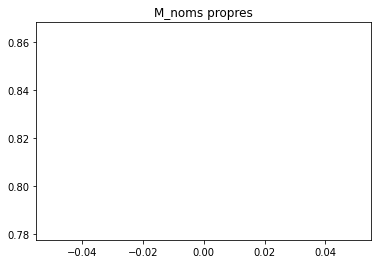

M_verbes: 0.2584158415841584


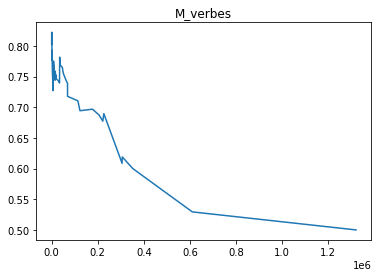

SD_adjectifs: 0.6


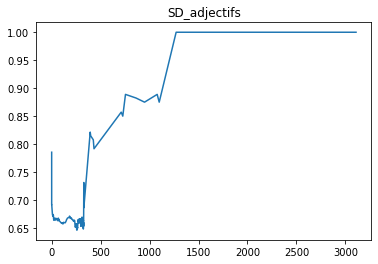

SD_prépositions: 0.5752475247524752


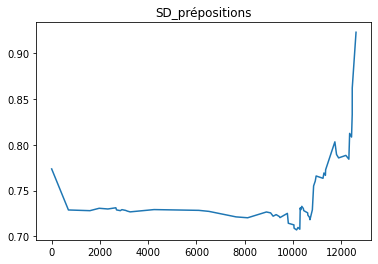

SD_adverbes: 0.14405940594059405


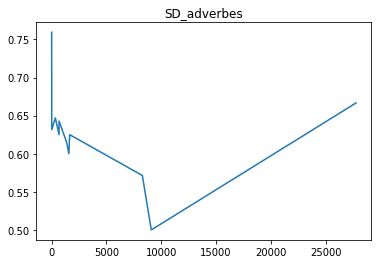

SD_déterminants: 0.6356435643564357


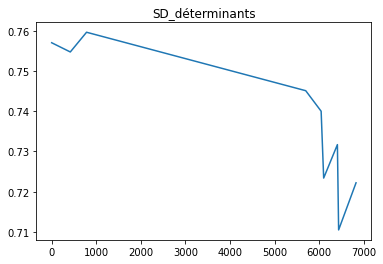

SD_noms: 0.8737623762376238


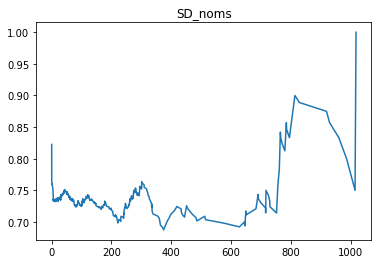

SD_noms propres: 0.30495049504950494


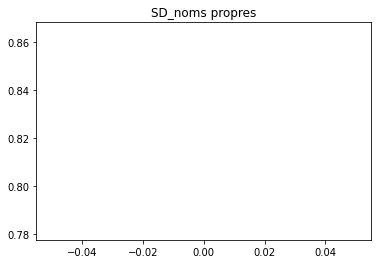

SD_verbes: 0.2584158415841584


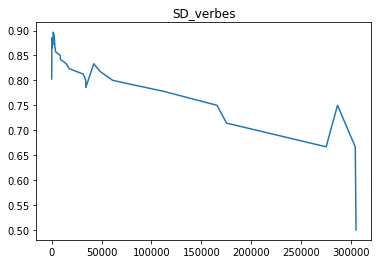

In [7]:
features = list(Dataframe.columns)[3:]
N = 10

for feature in features:
    couples = [(value, label) for value, label in zip(Dataframe.loc[:, feature], Dataframe.loc[:, 'label'])]
    couples = [couple for couple in couples if not np.isnan(couple[0])]
    print(f"{feature}: {len(couples) / Dataframe.shape[0]}")
    xs, ys = [], []
    for value, label in couples:
        xs.append(value)
        ys.append(np.mean([couple[1] for couple in couples if couple[0]>=value]))
    nxs, nys = [], []
    while xs:
        i = np.argmin(xs)
        nxs.append(xs[i])
        nys.append(ys[i])
        xs[-1], xs[i], ys[-1], ys[i] = xs[i], xs[-1], ys[i], ys[-1]
        xs.pop()
        ys.pop()
    xs, ys = nxs, nys
    plt.plot(xs, ys,)
    plt.title(feature)
    plt.show()